<a href="https://colab.research.google.com/github/SrihithaReddy13/100-days-of-code/blob/master/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
API_KEY="6JKqgT34udytyYt7tAHWRdEZf"
API_SECRET_KEY="lnYrXgrwUHBfpuwCSoQYt8LGZGXg3Ghgu7erCSiBNDbC1JyrNp" 
BEARER_TOKEN="AAAAAAAAAAAAAAAAAAAAAISTJAEAAAAACtW0PeEe50PIBXLfV2ccuQMRf3A%3D1RCr3MvzeongU2NDzLdvZg79LFw7DefRwag6usH1PcWOoT4NDL"

In [2]:
ACCESS_TOKEN_KEY="1315579201693515776-6fapBqeHm9DysjDMCaIacFbtDSqpey" 
ACCESS_TOKEN_SECRET="IKrAoscR9McGPqBeBSf0wIm4t9moufFYqitSnrXgDh9PD"

IMPORT LIBRARIES AND DATASETS

In [3]:
!pip install emoji

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import emoji

In [5]:
import tweepy
import pandas as pd
import os

#Twitter Access
auth = tweepy.OAuthHandler( API_KEY,API_SECRET_KEY)
auth.set_access_token(ACCESS_TOKEN_KEY,ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit = True)

msgs = []
msg =[]
query=input("Enter your keyword for search - ")
for tweet in tweepy.Cursor(api.search, q=query, rpp=100, lang='en').items(500):
    msg = [tweet.text, tweet.source, tweet.source_url] 
    msg = tuple(msg)                    
    msgs.append(msg)

tweets_df = pd.DataFrame(msgs)
tweets_df.head()


Enter your keyword for search - #WEARESTILLHERE


,0,1,2
0,#WEARESTILLHERE he may not want to come home a...,Twitter for iPhone,http://twitter.com/download/iphone
1,Please let’s trend for our boys a sweet messag...,Twitter for iPhone,http://twitter.com/download/iphone
2,Dear the guys who said it's gonna be 18 months...,Twitter for Android,http://twitter.com/download/android
3,Yesterday was 7 years since the iconic 1D and ...,Twitter for iPhone,http://twitter.com/download/iphone
4,RT @larrystylnshine: “Please don’t forget us” ...,Twitter for Android,http://twitter.com/download/android


In [6]:
tweets_df.rename(columns={0:'text',1:'device',2:'url'},inplace=True)

In [7]:
tweets_df.describe()  #DOESNT MAKE SENSE

,text,device,url
count,500,500,500
unique,287,4,4
top,RT @lovetheboysss: From: one direction ...,Twitter for iPhone,http://twitter.com/download/iphone
freq,38,226,226


In [8]:
tweets_df.drop_duplicates(subset=['text'],inplace=True)

In [9]:
tweets_df.index=range(len(tweets_df.index))

In [10]:
tweets_df['text']=tweets_df['text'].apply(lambda x: x.lower())

In [11]:
tweets_df['demojized']=tweets_df['text'].apply(emoji.demojize)

In [12]:
tweets_df

,text,device,url,demojized
0,#wearestillhere he may not want to come home a...,Twitter for iPhone,http://twitter.com/download/iphone,#wearestillhere he may not want to come home a...
1,please let’s trend for our boys a sweet messag...,Twitter for iPhone,http://twitter.com/download/iphone,please let’s trend for our boys a sweet messag...
2,dear the guys who said it's gonna be 18 months...,Twitter for Android,http://twitter.com/download/android,dear the guys who said it's gonna be 18 months...
3,yesterday was 7 years since the iconic 1d and ...,Twitter for iPhone,http://twitter.com/download/iphone,yesterday was 7 years since the iconic 1d and ...
4,rt @larrystylnshine: “please don’t forget us” ...,Twitter for Android,http://twitter.com/download/android,rt @larrystylnshine: “please don’t forget us” ...
...,...,...,...,...
282,5 years ago.... 31.10.15. 31.10.20 🆔😕 #we...,Twitter for Android,http://twitter.com/download/android,5 years ago.... 31.10.15. 31.10.20 :ID_bu...
283,"rt @ilovedyouufirst: i love those guys, they'r...",Twitter Web App,https://mobile.twitter.com,"rt @ilovedyouufirst: i love those guys, they'r..."
284,"rt @tpwkbixtches: #wearestillhere , always wil...",Twitter for iPhone,http://twitter.com/download/iphone,"rt @tpwkbixtches: #wearestillhere , always wil..."
285,we will never leave all of you🥺🥺 even though o...,Twitter for Android,http://twitter.com/download/android,we will never leave all of you:pleading_face::...


# TEXT VISUALISATION 

In [13]:
sentences = tweets_df['demojized'].tolist()

In [14]:
sentences_as_one_string = " ".join(sentences)

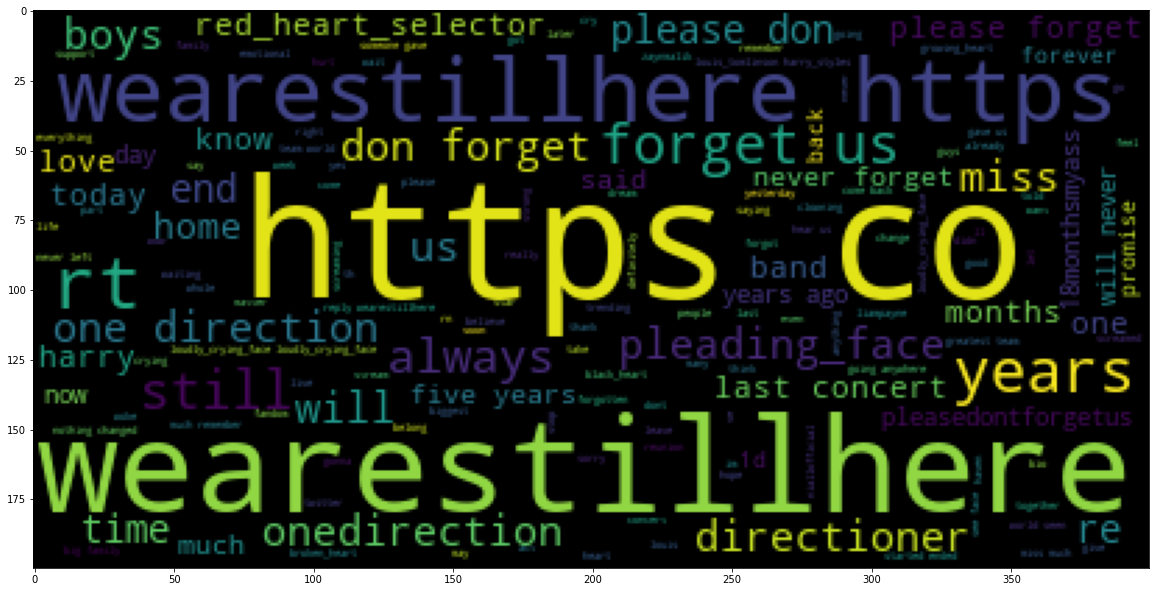

In [15]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

# CREATE A PIPELINE TO REMOVE PUNCTUATIONS, STOPWORDS AND PERFORM COUNT VECTORIZATION

In [16]:
import nltk
import string
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
from textblob import TextBlob

In [17]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def message_cleaning(tweet):
    tweet = tweet.lower() # convert text to lower-case
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet) # remove URLs
    tweet = re.sub('@[^\s]+', 'AT_USER', tweet) # remove usernames
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet) # remove the # in #hashtag
    tweet = [char for char in tweet if char not in string.punctuation]
    tweet = ''.join(tweet)
    tweet = word_tokenize(tweet) # remove repeated characters (helloooooooo into hello)
    return tweet

In [19]:
tweets_df['clean'] = tweets_df['demojized'].apply(message_cleaning)

In [20]:
print(tweets_df['clean'][5]) # show the cleaned up version

['rt', 'ATUSER', 'the', '31th', 'of', 'october', '2015', 'was', 'the', 'last', 'show', 'of', 'otra', '5', 'years', 'is', 'a', 'long', 'time', 'but', 'we', 'havent', 'forgotten', 'them', 'and', 'well', 'nev…']


In [21]:
print(tweets_df['text'][5]) # show the original version

rt @harrystylessyr: the 31th of october 2015 was the last show of otra
5 years is a long time, but we haven't forgotten them. and we'll nev…


In [22]:
def get_tweet_sentiment(tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(' '.join(tweet)) 
        # set sentiment 
        return analysis.sentiment.polarity 

In [23]:
tweets_df['sentiment']=tweets_df['clean'].apply(get_tweet_sentiment)

In [24]:
tweets_df.head()

,text,device,url,demojized,clean,sentiment
0,#wearestillhere he may not want to come home a...,Twitter for iPhone,http://twitter.com/download/iphone,#wearestillhere he may not want to come home a...,"[wearestillhere, he, may, not, want, to, come,...",0.40
1,please let’s trend for our boys a sweet messag...,Twitter for iPhone,http://twitter.com/download/iphone,please let’s trend for our boys a sweet messag...,"[please, let, ’, s, trend, for, our, boys, a, ...",0.35
2,dear the guys who said it's gonna be 18 months...,Twitter for Android,http://twitter.com/download/android,dear the guys who said it's gonna be 18 months...,"[dear, the, guys, who, said, its, gon, na, be,...",0.00
3,yesterday was 7 years since the iconic 1d and ...,Twitter for iPhone,http://twitter.com/download/iphone,yesterday was 7 years since the iconic 1d and ...,"[yesterday, was, 7, years, since, the, iconic,...",0.50
4,rt @larrystylnshine: “please don’t forget us” ...,Twitter for Android,http://twitter.com/download/android,rt @larrystylnshine: “please don’t forget us” ...,"[rt, ATUSER, “, please, don, ’, t, forget, us,...",0.20


In [25]:
# picking positive tweets from tweets 
ptweets = [tweet for tweet in tweets_df.index if tweets_df['sentiment'][tweet]>0] 
# percentage of positive tweets 
print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets_df.index))) 
# picking negative tweets from tweets 
ntweets = [tweet for tweet in tweets_df.index if tweets_df['sentiment'][tweet]<0] 
# percentage of negative tweets 
print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets_df.index))) 
# percentage of neutral tweets 
print("Neutral tweets percentage: {} %".format(100*(len(tweets_df.index) -(len( ntweets )+len( ptweets)))/len(tweets_df.index))) 

Positive tweets percentage: 24.738675958188153 %
Negative tweets percentage: 10.452961672473867 %
Neutral tweets percentage: 64.80836236933798 %


In [26]:

# printing first 5 positive tweets 
print("\n\nPositive tweets:") 
for tweet in ptweets[:10]: 
    print(tweets_df['text'][tweet]) 



Positive tweets:
#wearestillhere he may not want to come home and for us to wait for him but he he did enjoy being with the boys and… https://t.co/6u84h9atar
please let’s trend for our boys a sweet message that we are still here and will be here forever❤️ it’s 5th annivers… https://t.co/20ppsjddxk
yesterday was 7 years since the iconic 1d and 5sos teenager dirtbag cover... yesterday was 100 days since july 23rd… https://t.co/a0smn8vls3
rt @larrystylnshine: “please don’t forget us” 

“how could we forget someone who gave us so much to remember”

#wearestillhere #werestillhe…
“please don’t forget us”                        
    how could we forget someone who gave us so much to remember??… https://t.co/ftpqv7o4ti
#wearestillhere after 5 years you’re still strong in my heart  #pleasedontforgetus https://t.co/emrvuvwxwt
right now i wish u were with me
#wearestillhere https://t.co/6oxtbyxtyw
you and me got a whole lot of history #wearestillhere https://t.co/jznvh9ajot
5 lat... wow 
#weare

In [27]:


# printing first 5 negative tweets 
print("\n\nNegative tweets:") 
for tweet in ntweets[:10]: 
    print(tweets_df['text'][tweet]) 
  



Negative tweets:
rt @harrystylessyr: the 31th of october 2015 was the last show of otra
5 years is a long time, but we haven't forgotten them. and we'll nev…
#pleasedontforgetus #wearestillhere  
where do broken hearts go? 💔
31.10.15 https://t.co/3szwyvx9sv
you screaming, in 2015, “please don’t forget us”
and anger 5 years, we’re screaming “we are still here, can you hea… https://t.co/yaur2dsmja
we really got broken heart but trust us #wearestillhere with you boys&lt;3 https://t.co/zxu9mgcukr
this is not the end❤️
5 years!😭 i'm not okay.
#wearestillhere 
we never left🥺 https://t.co/fyhw5qhtjb
rt @louisiscutee: to the boys, we know we sound impatient, we really don’t mean to be, we just miss you. we didn’t realise how hard it must…
rt @marley_berwick: it’s crazy to think that it’s been five years and yet there are so many of us waiting for them to come back to us #wear…
im late cause i just woke up but #wearestillhere and we miss you sm guys. we will never forget you! always in our h…

In [28]:
!pip install vaderSentiment

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [30]:
def get_vader_sentiment(tweet): 
        return analyser.polarity_scores(' '.join(tweet))['compound']
        
           

In [31]:
tweets_df['vaderScore']=tweets_df['clean'].apply(get_vader_sentiment)

In [32]:
tweets_df.head()

,text,device,url,demojized,clean,sentiment,vaderScore
0,#wearestillhere he may not want to come home a...,Twitter for iPhone,http://twitter.com/download/iphone,#wearestillhere he may not want to come home a...,"[wearestillhere, he, may, not, want, to, come,...",0.40,0.6356
1,please let’s trend for our boys a sweet messag...,Twitter for iPhone,http://twitter.com/download/iphone,please let’s trend for our boys a sweet messag...,"[please, let, ’, s, trend, for, our, boys, a, ...",0.35,0.6486
2,dear the guys who said it's gonna be 18 months...,Twitter for Android,http://twitter.com/download/android,dear the guys who said it's gonna be 18 months...,"[dear, the, guys, who, said, its, gon, na, be,...",0.00,0.3818
3,yesterday was 7 years since the iconic 1d and ...,Twitter for iPhone,http://twitter.com/download/iphone,yesterday was 7 years since the iconic 1d and ...,"[yesterday, was, 7, years, since, the, iconic,...",0.50,0.0000
4,rt @larrystylnshine: “please don’t forget us” ...,Twitter for Android,http://twitter.com/download/android,rt @larrystylnshine: “please don’t forget us” ...,"[rt, ATUSER, “, please, don, ’, t, forget, us,...",0.20,-0.1280


In [33]:
def get_polarity(score):
  if score<0:
    return -1
  if score==0:
    return 0
  return 1

In [34]:
tweets_df['polarity']=tweets_df['vaderScore'].apply(get_polarity)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


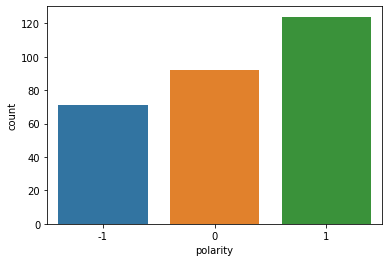

In [35]:
import seaborn as sns
sns.countplot(tweets_df['polarity'])

In [36]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #print(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
    # extracting hashtags from positive tweets
HT_positive = hashtag_extract(tweets_df['text'][tweets_df['polarity'] == 1])
    # extracting hashtags from negative tweets
HT_negative = hashtag_extract(tweets_df['text'][tweets_df['polarity'] == -1])# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

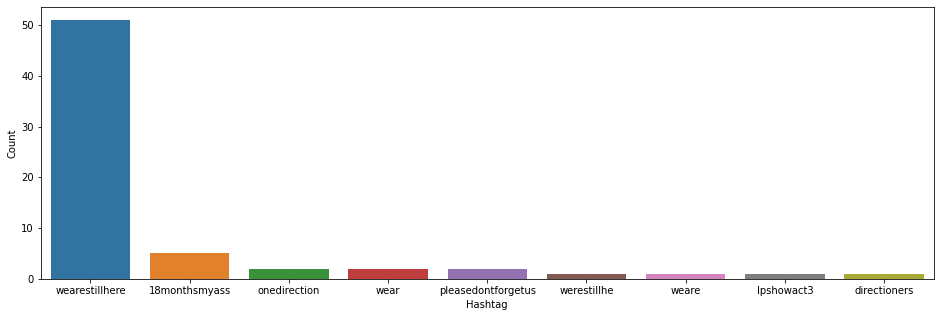

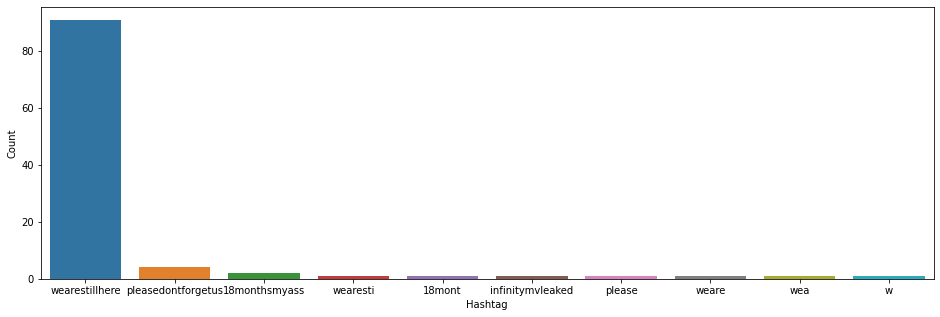

In [37]:
b=nltk.FreqDist(HT_negative)
a=nltk.FreqDist(HT_positive)
e1=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e1=e1.nlargest(columns="Count",n=10)
e2=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
e2=e2.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e1,x="Hashtag",y="Count")
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e2,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

plotted only for vader score for now. we can plot for text blob score also. maybe try out ibm watson?

evaluating such a thing is difficult because we are not running any model. drat.

is this ok? or should we settle for a dataset which is already available and apply an algorithm simply and produce results?

IDEA - Use the dataset from coursera to train the naive bayes model but use the corpus generated from the twitter to predict the emotions~!!

In [75]:
twitter_df=pd.read_csv('twitter.csv')

In [99]:
twitter_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


##EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


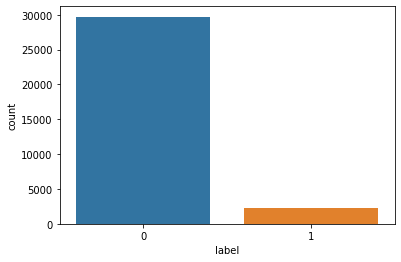

In [100]:
sns.countplot(twitter_df.label)

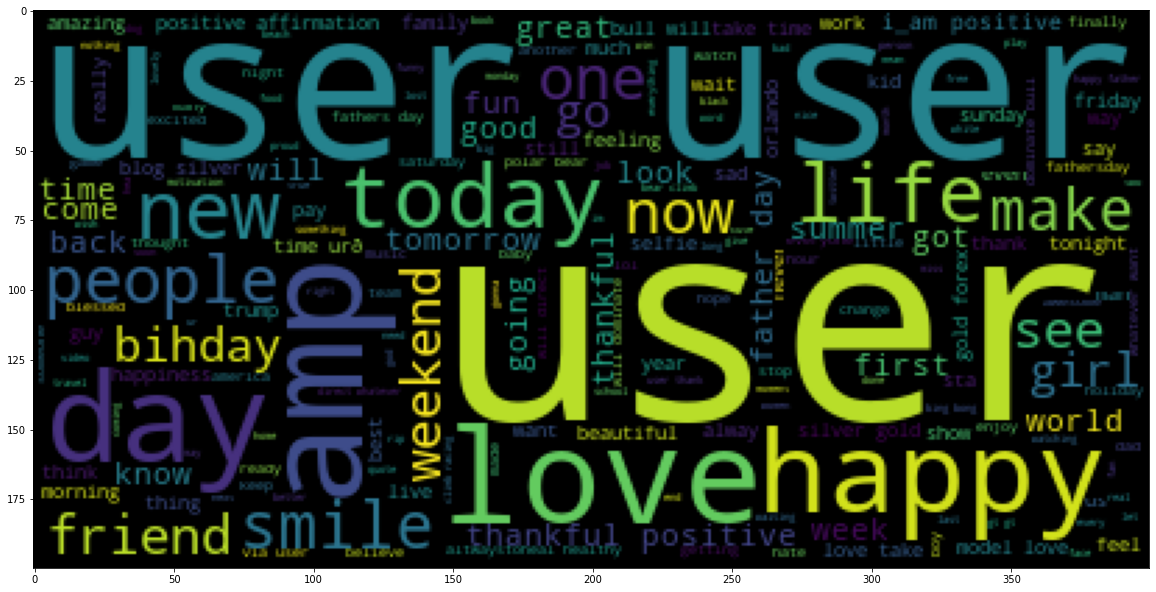

In [102]:
from wordcloud import WordCloud
sentences = twitter_df['tweet'].tolist()
sentences_as_one_string = " ".join(sentences)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [105]:
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        #print(i)
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
    # extracting hashtags from positive tweets
HT_positive = hashtag_extract(twitter_df['tweet'][twitter_df['label'] == 1])
    # extracting hashtags from negative tweets
HT_negative = hashtag_extract(twitter_df['tweet'][twitter_df['label'] == 0])# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])

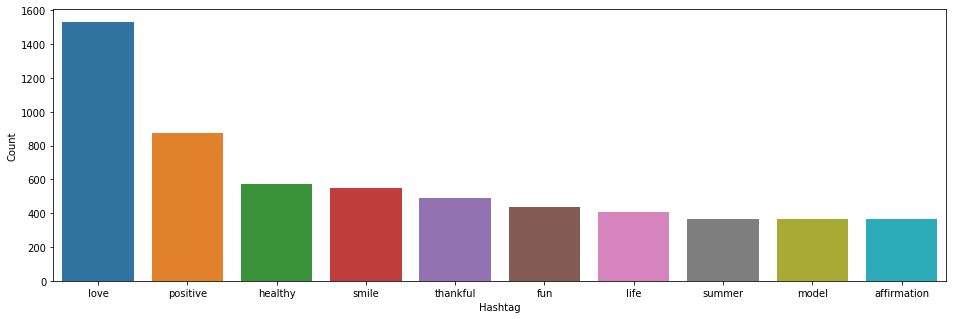

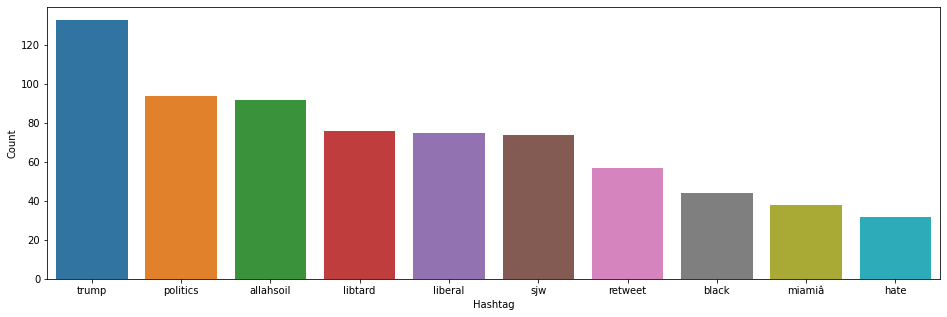

In [106]:
b=nltk.FreqDist(HT_negative)
a=nltk.FreqDist(HT_positive)
e1=pd.DataFrame({'Hashtag':list(b.keys()),'Count':list(b.values())})
e1=e1.nlargest(columns="Count",n=10)
e2=pd.DataFrame({'Hashtag':list(a.keys()),'Count':list(a.values())})
e2=e2.nlargest(columns="Count",n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e1,x="Hashtag",y="Count")
plt.figure(figsize=(16,5))
ax=sns.barplot(data=e2,x="Hashtag",y="Count")
ax.set(ylabel='Count')
plt.show()

In [77]:
twitter_df.shape

(31962, 3)

In [78]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
# Let's test the newly added function
tweets_df_clean = twitter_df['tweet'].apply(message_cleaning)

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning,dtype="uint8")
tweets_countvectorizer =vectorizer.fit_transform(twitter_df['tweet'])

In [82]:
tweets = pd.DataFrame(tweets_countvectorizer.toarray())
X = tweets

In [83]:
y = twitter_df['label']

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

###NAIVE BAYES CLASSIFIER USING A DATASET WITH LABELS

In [85]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [86]:
y_predict_test = NB_classifier.predict(X_test)

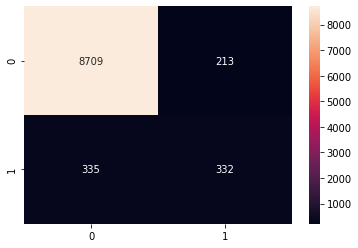

In [87]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True,fmt="d")

In [88]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8922
           1       0.61      0.50      0.55       667

    accuracy                           0.94      9589
   macro avg       0.79      0.74      0.76      9589
weighted avg       0.94      0.94      0.94      9589



###LOGISTIC LINEAR REGRESSION

In [89]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [95]:
y_predict_test_llr=clf.predict(X_test)

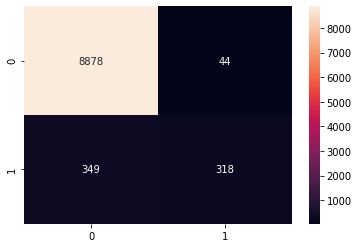

In [96]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict_test_llr)
sns.heatmap(cm, annot=True,fmt="d")

In [98]:
print(classification_report(y_test, y_predict_test_llr))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8922
           1       0.88      0.48      0.62       667

    accuracy                           0.96      9589
   macro avg       0.92      0.74      0.80      9589
weighted avg       0.96      0.96      0.95      9589

